<a href="https://colab.research.google.com/github/xuanthang482/CS114.K21/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

In [0]:
# Load dataset
dataset2 = pd.read_csv('https://cs.uit.edu.vn/data2.txt',names= ['size','time'])

In [0]:
# Load dataset
dataset3 = pd.read_csv('https://cs.uit.edu.vn/data3.txt',names= ['size','time'])

In [12]:
dataset2.head(30)

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
5,1355574,0.098012
6,725488,0.048238
7,1191887,0.089304
8,4556292,0.378561
9,9989596,0.832734


In [13]:
print(dataset2.shape)

(71115, 2)


In [17]:
print(dataset3.shape)

(10590, 2)


data 3 sẽ có kết quả tệ hơn data2 bởi vì số lượng data ít hơn biểu hiện ở số chiều ít hơn 

tăng số feature của data

In [18]:
dataset3['size2'] = dataset3['size']*dataset['size']
dataset3['sizeLogsize'] = dataset3['size']*np.log10(dataset3['size'])
dataset3


,size,time,size2,sizeLogsize
0,37837612,4.12166,1431684881862544,2.867305e+08
1,37395246,3.92089,1398404423400516,2.831873e+08
2,36610827,3.21540,1340352653623929,2.769100e+08
3,29555651,2.54506,873536506033801,2.207996e+08
4,25928216,2.21831,672272384942656,1.922259e+08
...,...,...,...,...
10585,26872494,2.35117,722130933780036,1.996440e+08
10586,20753811,1.79155,430720671023721,1.518577e+08
10587,33520323,2.90918,1123612054024329,2.522508e+08
10588,21243264,1.80292,451276265373696,1.556541e+08


In [0]:
dataset3 = pd.DataFrame(dataset3, columns=['size2', 'sizeLogsize', 'size', 'time'])

In [20]:
dataset3.head(10)

,size2,sizeLogsize,size,time
0,1431684881862544,2.867305e+08,37837612,4.12166
1,1398404423400516,2.831873e+08,37395246,3.92089
2,1340352653623929,2.769100e+08,36610827,3.21540
3,873536506033801,2.207996e+08,29555651,2.54506
4,672272384942656,1.922259e+08,25928216,2.21831
5,925565743764544,2.276623e+08,30423112,2.61376
6,478786432053721,1.606095e+08,21881189,1.85961
7,1282368920012041,2.705103e+08,35810179,3.14761
8,1249979914053025,2.668759e+08,35355055,3.07585
9,864342301290601,2.195670e+08,29399699,2.56714


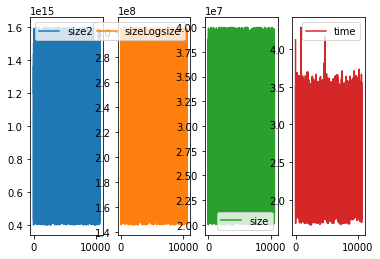

In [21]:
# box and whisker plots
dataset3.plot( subplots=True, layout=(1,4), sharex=False, sharey=False)
pyplot.show()

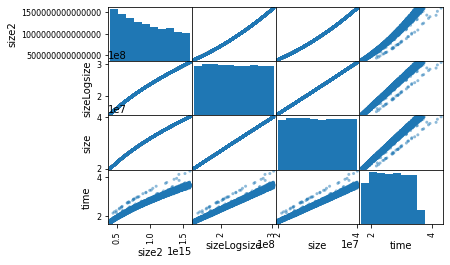

In [22]:
# scatter plot matrix
scatter_matrix(dataset3)
pyplot.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [0]:
# Split-out validation dataset
array = dataset3.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20 , random_state=1)

In [31]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
LR_model = LinearRegression()
LR_model.fit(X_train , Y_train)
val_pred_1 = LR_model.predict(X_validation)
print (val_pred_1)
print (mean_absolute_error(val_pred_1 , Y_validation))


[3.26014681 1.8370136  3.53709165 ... 2.78361362 2.00329627 2.69432084]
0.043011429160482534
